pip install astroML

In [221]:
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_filter, fetch_vega_spectrum
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import math as m

Text(0, 0.5, 'Normalized Flux / Filter Transmission')

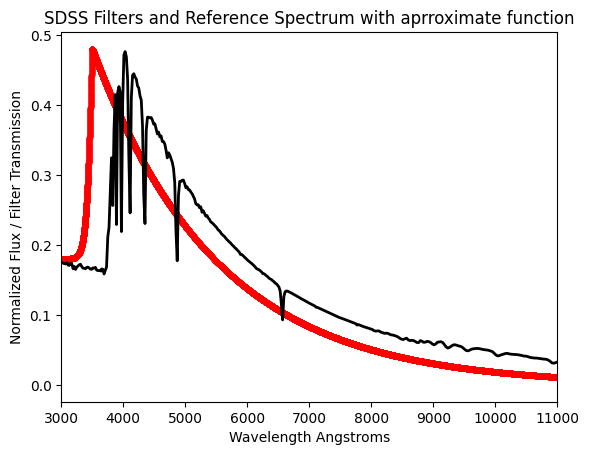

In [381]:
import math
spec=fetch_vega_spectrum()
lam = spec[0]
spectrum = spec[1] / 2.1 / spec[1].max()


import math

def smooth_transition(x):
    # Función polinómica para suavizar la transición entre las partes constante y exponencial
    return 0.18 + 0.30 * (1 + math.tanh(0.01 * (x - 3500)))

def trozos(x):
    if x < 3500:
        # Función suave que conecta la parte constante con la exponencial
        return smooth_transition(x)
    else:
        # Función exponencial decreciente para x >= 3500
        return 0.48 * math.exp(-(x - 3500) / 2000)




"""
def trozos(x):
    if x<3500:
        return 0.18
    elif -3500 <= x < 4100:
        # Función lineal que conecta los extremos de la transición
        return (0.7 * x + 3500) / 20000
    else:
        # Función exponencial decreciente para x >= 4100
        return 0.48 * math.exp(-(x - 4100) / 2000)

    import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def trozos(x):
    if x < 3500:
        return 0.18
    elif -3500 <= x < 4100:
        # Función de transición suave hacia la parte exponencial
        transition = sigmoid((x - 3500) / 200)
        # Combinación suave de la parte lineal y la exponencial
        return (1 - transition) * ((0.7 * x + 3500) / 20000) + transition * (0.48 * math.exp(-(x - 4100) / 2000))
    else:
        # Función exponencial decreciente para x >= 4100
        return 0.48 * math.exp(-(x - 4100) / 2000)
"""


fig=plt.figure()
ax=fig.add_subplot(111)
trozos=np.vectorize(trozos)
x=np.linspace(3000,11000,50000)
y=[trozos(xi) for xi in x]
ax.plot(x,y,".r",lw=2)
ax.plot(lam,spectrum, "-k",lw=2)

ax.set_xlim(3000,11000)

ax.set_title("SDSS Filters and Reference Spectrum with aprroximate function")
ax.set_xlabel("Wavelength Angstroms")
ax.set_ylabel("Normalized Flux / Filter Transmission")

In [316]:
spec[1].max()

7.58322e-14

In [317]:
spec[1][0]/2.1/spec[1].max()

1.5288140570012912e-08

In [318]:
spectrum #valores del flujo normalizados

array([1.52881406e-08, 8.22819204e-08, 1.18176962e-07, ...,
       4.13636323e-08, 3.93149989e-08, 3.73805273e-08])

In [319]:
spectrum.max() #Valor máximo del espectro

0.47619047619047616

In [320]:
spectrum.min()

1.5288140570012912e-08

In [321]:
for f, c, loc in zip('r',"r", [6100]):
    data_r = fetch_sdss_filter(f)

In [322]:
len(data_r[4])

75

In [323]:
for f,c,loc in zip("g","b",[3500]):
    data_g=fetch_sdss_filter(f)
   

In [324]:
len(data_g[0])

89

In [325]:
#Hacemos el cálculo para el filtro r con z=0

producto_r=[]

for k in range(len(data_r[0])-1):
    Delta_lam=(data_r[0][k+1]-data_r[0][k])
    # Cálculo del producto: (filtro)(flujo)(d\lambda)
    producto_r.append(data_r[1][k]* trozos(data_r[0][k]) *Delta_lam)
    
I_r=sum(producto_r)
I_r

69.48383494032099

In [363]:
#Hacemos el cálculo para el filtro r con z=1.5

producto_r=[]

for k in range(len(data_r[0])-1):
    Delta_lam=(data_r[0][k+1]-data_r[0][k])/2.5
    # Cálculo del producto: (filtro)(flujo)(d\lambda)
    producto_r.append(data_r[1][k]* trozos(data_r[0][k]/2.5) *Delta_lam)
    
I_r=sum(producto_r)
I_r

39.322442165980235

In [326]:
#Hacemos el cálculo para el filtro g con z=0

producto_g=[]

for k in range(len(data_g[0])-1):
    Delta_lam=(data_g[0][k+1]-data_g[0][k])
    # Cálculo del producto: (filtro)(flujo)(d\lambda)
    producto_g.append(data_g[1][k]* trozos(data_g[0][k]) *Delta_lam)


I_g=sum(producto_g)
I_g

111.31265482021469

In [354]:
#Hacemos el cálculo para el filtro g con z=1.5

producto_g=[]

for k in range(len(data_g[0])-1):
    Delta_lam=(data_g[0][k+1]-data_g[0][k])/2.5
    # Cálculo del producto: (filtro)(flujo)(d\lambda)
    producto_g.append(data_g[1][k]* trozos(data_g[0][k]/2.5) *Delta_lam)


I_g=sum(producto_g)
I_g

30.13344000001867

In [329]:
#Calculamos la magnitud absoluta para los filtros g y r

mag_abs_gr=-2.5*m.log(I_g/I_r)
mag_abs_gr


-1.1781220429483594

### Ahora, para el filtro g a cualquier redshift z

In [337]:
len(producto_g)

88

In [383]:
zz = np.linspace(0, 1.5, 88)


I_G=[]

for s in range(len(zz)):
    producto_G=[]
    for k in range(len(data_g[0])-1):
        Delta_lam=(data_g[0][k+1]-data_g[0][k])
        # Cálculo del producto: (filtro)(flujo)(d\lambda)
        producto_G.append(data_g[1][k]* trozos(data_g[0][k]/(zz[s]+1)) *Delta_lam)
        
    I_gg=sum(producto_G)
    I_G.append(I_gg)
    
I_G

[111.31265482021469,
 115.78002702613104,
 120.27009890573179,
 124.77911425146007,
 129.29595004854724,
 133.8086183663013,
 138.27802869256016,
 142.54275574297878,
 146.31525191690412,
 149.27725067813594,
 151.37752561294874,
 152.55626984048035,
 153.0400506512158,
 152.9045525620872,
 152.21067489573855,
 151.1086184917016,
 149.44660450338054,
 147.4427778913508,
 145.0036898098628,
 142.1730073878702,
 139.00155443540203,
 135.38517336827874,
 131.52156088234423,
 127.26885591282726,
 122.74042322317396,
 117.90984414370008,
 112.71653540482801,
 107.30823832290953,
 101.52678839275364,
 95.61231997972077,
 89.76086757498558,
 84.63687933424663,
 80.82374002969502,
 78.38431997093643,
 76.97708997399063,
 76.20642745569938,
 75.79685382986915,
 75.58010912765207,
 75.4641668872355,
 75.40230333593995,
 75.36979209846574,
 75.3527681596091,
 75.34383844617241,
 75.33912574260472,
 75.33661601843406,
 75.33526528097238,
 75.33453011713196,
 75.33412541682712,
 75.33390010672566,


In [352]:
len(producto_G)

88

In [358]:
len(I_G)

88

### Para el filtro r a cualquier z 

In [382]:
zz = np.linspace(0, 1.5, 88)


I_R=[]

for s in range(len(zz)):
    producto_R=[]
    for k in range(len(data_r[0])-1):
        Delta_lam=(data_r[0][k+1]-data_r[0][k])
        # Cálculo del producto: (filtro)(flujo)(d\lambda)
        producto_R.append(data_r[1][k]* trozos(data_r[0][k]/(zz[s]+1))*Delta_lam)
        
    I_rr=sum(producto_R)
    I_R.append(I_rr)
    
I_R

[69.48383494032099,
 73.18677982327134,
 76.95438187986134,
 80.78347895455788,
 84.67096451665846,
 88.61379291209626,
 92.6089837366621,
 96.65362541894164,
 100.74487809466483,
 104.87997584777098,
 109.0562283873504,
 113.2710222237811,
 117.52182140186537,
 121.80616784359268,
 126.12168134831983,
 130.46605929366876,
 134.83707607628165,
 139.23258232773475,
 143.65050393738582,
 148.08884091068867,
 152.5456660885533,
 157.0191237506194,
 161.50742812285753,
 166.0088618076653,
 170.5217741526015,
 175.0445795720575,
 179.57575583450156,
 184.11384232642894,
 188.6574383027953,
 193.205201132491,
 197.75584454631533,
 202.30813689392718,
 206.858477969219,
 211.3002499548346,
 215.2969925616437,
 218.27441861218978,
 219.7843736044209,
 219.69380874002113,
 218.0710329575263,
 215.35963596806423,
 211.6543672739643,
 207.32254974361356,
 202.43454361423974,
 197.0495660676112,
 191.36663966473887,
 185.2097159869322,
 178.80998585637553,
 172.03094136208335,
 164.92871307040016,

In [388]:
for f,c,loc in zip("i","m", [7500]):
    data_i= fetch_sdss_filter(f)

In [390]:
print(data_i)

[[6.430e+03 6.455e+03 6.480e+03 6.505e+03 6.530e+03 6.555e+03 6.580e+03
  6.605e+03 6.630e+03 6.655e+03 6.680e+03 6.705e+03 6.730e+03 6.755e+03
  6.780e+03 6.805e+03 6.830e+03 6.855e+03 6.880e+03 6.905e+03 6.930e+03
  6.955e+03 6.980e+03 7.005e+03 7.030e+03 7.055e+03 7.080e+03 7.105e+03
  7.130e+03 7.155e+03 7.180e+03 7.205e+03 7.230e+03 7.255e+03 7.280e+03
  7.305e+03 7.330e+03 7.355e+03 7.380e+03 7.405e+03 7.430e+03 7.455e+03
  7.480e+03 7.505e+03 7.530e+03 7.555e+03 7.580e+03 7.605e+03 7.630e+03
  7.655e+03 7.680e+03 7.705e+03 7.730e+03 7.755e+03 7.780e+03 7.805e+03
  7.830e+03 7.855e+03 7.880e+03 7.905e+03 7.930e+03 7.955e+03 7.980e+03
  8.005e+03 8.030e+03 8.055e+03 8.080e+03 8.105e+03 8.130e+03 8.155e+03
  8.180e+03 8.205e+03 8.230e+03 8.255e+03 8.280e+03 8.305e+03 8.330e+03
  8.355e+03 8.380e+03 8.405e+03 8.430e+03 8.455e+03 8.480e+03 8.505e+03
  8.530e+03 8.555e+03 8.580e+03 8.605e+03 8.630e+03]
 [0.000e+00 1.000e-04 3.000e-04 4.000e-04 4.000e-04 3.000e-04 3.000e-04
  4.000e-04

In [391]:
zz = np.linspace(0, 1.5, 88)


I_I=[]

for s in range(len(zz)):
    producto_I=[]
    for k in range(len(data_i[0])-1):
        Delta_lam=(data_i[0][k+1]-data_i[0][k])
        # Cálculo del producto: (filtro)(flujo)(d\lambda)
        producto_I.append(data_i[1][k]* trozos(data_i[0][k]/(zz[s]+1)) *Delta_lam)
        
    I_ii=sum(producto_I)
    I_I.append(I_ii)
    
I_I

[29.25114415851169,
 31.151821302183542,
 33.106769867390625,
 35.114572130662545,
 37.17377993998906,
 39.28292138562686,
 41.440506924740504,
 43.64503498491541,
 45.89499707288575,
 48.188882415554545,
 50.525182160643816,
 52.90239316419585,
 55.3190213917328,
 57.773584959228465,
 60.264616839219805,
 62.79066725642055,
 65.35030579614818,
 67.9421232477534,
 70.56473320409107,
 73.21677343690124,
 75.89690706680416,
 78.60382354546009,
 81.33623946632147,
 84.09289921931348,
 86.87257550372748,
 89.67406971260344,
 92.49621220091944,
 95.33786244899062,
 98.19790913162035,
 101.07527010273019,
 103.96889230443166,
 106.87775160878275,
 109.80085259980459,
 112.73722830270171,
 115.68593986665076,
 118.64607620697346,
 121.6167536120093,
 124.59711531953326,
 127.58633106713108,
 130.58359662054374,
 133.58813328362328,
 136.59918739319994,
 139.6160298018468,
 142.63795535123685,
 145.6642823385253,
 148.6943519779389,
 151.7275278595367,
 154.76319540689627,
 157.80076133529136,

In [392]:
#Calculamos la magnitud para los filtros r e i

mag_abs_RI=-2.5*np.log(np.array(I_R)/np.array(I_I))
mag_abs_RI

array([-2.16293861e+00, -2.13535522e+00, -2.10868753e+00, -2.08289068e+00,
       -2.05792267e+00, -2.03374417e+00, -2.01031831e+00, -1.98761046e+00,
       -1.96558812e+00, -1.94422067e+00, -1.92347934e+00, -1.90333699e+00,
       -1.88376803e+00, -1.86474832e+00, -1.84625505e+00, -1.82826665e+00,
       -1.81076272e+00, -1.79372394e+00, -1.77713201e+00, -1.76096958e+00,
       -1.74522017e+00, -1.72986815e+00, -1.71489867e+00, -1.70029760e+00,
       -1.68605150e+00, -1.67214758e+00, -1.65857366e+00, -1.64531811e+00,
       -1.63236988e+00, -1.61971839e+00, -1.60735355e+00, -1.59526573e+00,
       -1.58341646e+00, -1.57055103e+00, -1.55284833e+00, -1.52402040e+00,
       -1.47943052e+00, -1.41787336e+00, -1.34006902e+00, -1.25073937e+00,
       -1.15048292e+00, -1.04306198e+00, -9.28801456e-01, -8.07864156e-01,
       -6.82216574e-01, -5.48989782e-01, -4.10593445e-01, -2.64445438e-01,
       -1.10450264e-01,  5.12227365e-02,  2.23528834e-01,  4.04369463e-01,
        5.97279276e-01,  

In [366]:
len(I_R)

74

In [384]:
#Calculamos la magnitud para los filtros g y r

mag_abs_GR=-2.5*np.log(np.array(I_G)/np.array(I_R))
mag_abs_GR

array([-1.17812204, -1.14669318, -1.11631809, -1.08693153, -1.05832806,
       -1.03030759, -1.00220051, -0.9712707 , -0.93293048, -0.88247178,
       -0.8197832 , -0.74437534, -0.66018906, -0.56845724, -0.47004604,
       -0.36721449, -0.25717991, -0.14323591, -0.02343974,  0.10191923,
        0.23244721,  0.37060938,  0.51345084,  0.66434837,  0.82197813,
        0.98780096,  1.16430257,  1.34962212,  1.54902547,  1.7586279 ,
        1.97471014,  2.17855467,  2.34941036,  2.4791405 ,  2.57127648,
        2.63076816,  2.6614754 ,  2.66760414,  2.65290729,  2.62367883,
        2.5813701 ,  2.53023783,  2.47088611,  2.40363926,  2.33056221,
        2.24885107,  2.16096278,  2.06435282,  1.95895776,  1.84497557,
        1.71946335,  1.58452907,  1.43666893,  1.27977066,  1.12330148,
        0.98245349,  0.87205474,  0.79471683,  0.74428672,  0.71275633,
        0.69357988,  0.68208132,  0.67524624,  0.67122005,  0.66885336,
        0.66746019,  0.66663704,  0.66614804,  0.66585566,  0.66

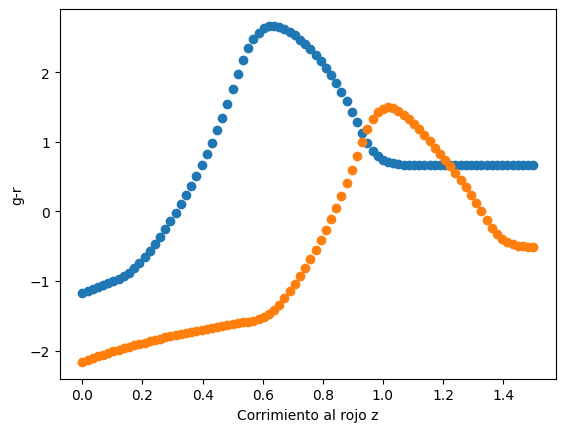

In [395]:
#Graficamos color (g-r) vs z
plt.scatter(zz,mag_abs_GR)
plt.scatter(zz,mag_abs_RI)
plt.xlabel("Corrimiento al rojo z")
plt.ylabel("g-r")
plt.show()

Text(0, 0.5, 'r-i')

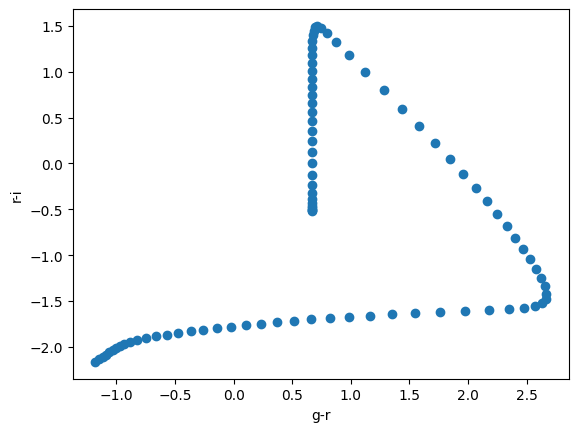

In [397]:
plt.scatter(mag_abs_GR,mag_abs_RI)
plt.xlabel("g-r")
plt.ylabel("r-i")

In [76]:
tabla_filtros=pd.DataFrame(data)

In [77]:
tabla_filtros

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,7730.0000,7755.0000,7780.0000,7805.0000,7830.0000,7855.0000,7880.0000,7905.0000,7930.0000,7955.0000,...,11005.0000,11030.0000,11055.0000,11080.0000,11105.0000,11130.0000,11155.0000,11180.0000,11205.0000,11230.0000
1,0.0000,0.0000,0.0001,0.0001,0.0001,0.0002,0.0002,0.0003,0.0005,0.0007,...,0.0004,0.0004,0.0003,0.0003,0.0002,0.0002,0.0001,0.0001,0.0000,0.0000
2,0.0000,0.0000,0.0001,0.0001,0.0001,0.0002,0.0002,0.0003,0.0005,0.0007,...,0.0004,0.0004,0.0003,0.0003,0.0002,0.0002,0.0001,0.0001,0.0000,0.0000
3,0.0000,0.0000,0.0001,0.0001,0.0001,0.0002,0.0002,0.0003,0.0005,0.0007,...,0.0004,0.0004,0.0003,0.0003,0.0002,0.0002,0.0001,0.0001,0.0000,0.0000
4,0.9602,0.9615,0.9605,0.9583,0.9559,0.9541,0.9541,0.9567,0.9622,0.9692,...,0.9638,0.9643,0.9648,0.9654,0.9659,0.9664,0.9669,0.9673,0.9677,0.9682


array([0.9602, 0.9615, 0.9605, 0.9583, 0.9559, 0.9541, 0.9541, 0.9567,
       0.9622, 0.9692, 0.9762, 0.9814, 0.9833, 0.9801, 0.9702, 0.9524,
       0.9285, 0.9075, 0.8931, 0.8853, 0.8843, 0.8902, 0.9033, 0.9242,
       0.9483, 0.9591, 0.9576, 0.9567, 0.9564, 0.9565, 0.9569, 0.9576,
       0.9584, 0.9592, 0.9598, 0.9602, 0.9603, 0.9599, 0.9593, 0.9586,
       0.9578, 0.9571, 0.9567, 0.9566, 0.9571, 0.9582, 0.96  , 0.9591,
       0.9314, 0.8923, 0.8648, 0.8633, 0.8787, 0.8961, 0.902 , 0.898 ,
       0.8931, 0.8962, 0.9138, 0.9352, 0.9407, 0.9103, 0.8345, 0.7441,
       0.6752, 0.6524, 0.6794, 0.7178, 0.7184, 0.6897, 0.7003, 0.7214,
       0.7147, 0.7251, 0.7594, 0.7923, 0.8302, 0.8766, 0.915 , 0.9253,
       0.9059, 0.8947, 0.9045, 0.9262, 0.95  , 0.9652, 0.9656, 0.9642,
       0.963 , 0.9618, 0.9607, 0.9597, 0.9588, 0.9579, 0.9572, 0.9565,
       0.9559, 0.9553, 0.9549, 0.9545, 0.9541, 0.9539, 0.9537, 0.9535,
       0.9534, 0.9534, 0.9534, 0.9535, 0.9536, 0.9537, 0.9539, 0.9541,
      

47